In [42]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [43]:
fname = 'May2000-uvt.nc'
ds = xr.open_dataset(fname)

In [44]:
#select a latitude in north hemisphere lambda 40 and symmetric in south hemisphere -40

#Plot histograms for the zonal wind at north hemisphere and south hemisphere and at pressure level 500mb.

#for north hemisphere
wu1 = ds.u.sel(latitude=40,level=500,  method="nearest") #zonal component
df   = wu1.to_dataframe()
df1  = df.reset_index(level='longitude')


#calculate mean and std

mean1 = np.mean(df1.u)
std1 = np.std(df1.u, ddof=1)



In [45]:
mean1

12.60075569152832

In [46]:
std1

9.794513702392578

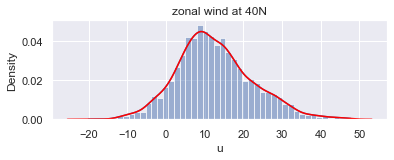

In [47]:
ax1=plt.subplot(2,1,1)
sns.set(style="darkgrid") 
sns.histplot(data=df1.u,ax=ax1, stat="density",kde=True)
sns.kdeplot(data=df1.u,ax=ax1, color="red")
plt.title("zonal wind at 40N")
plt.savefig('Ex5_north',dpi=1000)

In [48]:
######for south hemispher 
wu2 = ds.u.sel(latitude= -40,level=500, method="nearest")

df2   = wu2.to_dataframe()
df3  = df2.reset_index(level='longitude')

In [49]:
#calculate mean and std

mean2 = np.mean(df3.u)
std2 = np.std(df3.u, ddof=1)

In [50]:
mean2

15.396017074584961

In [51]:
std2

10.888506889343262

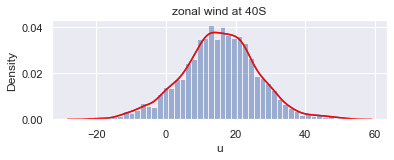

In [52]:
ax2=plt.subplot(2,1,2)
sns.set(style="darkgrid")
sns.histplot(data=df3.u,ax=ax2,stat="density",kde=True)
sns.kdeplot(data=df3.u, ax=ax2, color="red")
plt.title("zonal wind at 40S")
plt.savefig('Ex5_south',dpi=1000)

In [53]:
#verify whether the samples have the same mean using Pearson’s t-test.

to,pv=scipy.stats.ttest_ind(mean1,mean2)
print('The Samples do not have the same mean')

The Samples do not have the same mean


/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
